<a href="https://colab.research.google.com/github/superbunny38/2021DeepLearning/blob/main/2_Chap_6_%EA%B2%8C%EC%9D%B4%ED%8A%B8%EA%B0%80_%EC%B6%94%EA%B0%80%EB%90%9C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

$y_0$

$\uparrow$

$softmax$

$\uparrow$

$\qquad$ $\qquad$ $\qquad$ $LSTM$ $\quad$ $\to$ $\quad$ $LSTM$

$\uparrow$

$Embedding$

$\uparrow$

$W_0$ 
</center>

### 기울기 폭발

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2#미니 배치 크기
H = 3#은닉 상태 벡터의 차원 수
T = 20#시계열 데이터의 길이

In [3]:
dh = np.ones((N,H))#chrlghk
np.random.seed(3)#재현할 수 있도록 난수의 시드 고정
Wh = np.random.randn(H,H)

In [4]:
norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2))/N#L2 norm
  norm_list.append(norm)

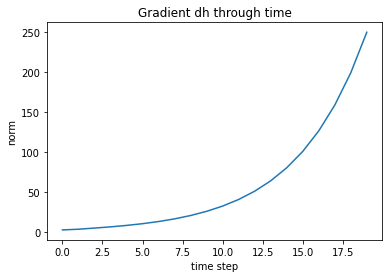

In [5]:
plt.plot(norm_list)
plt.title("Gradient dh through time")
plt.xlabel("time step")
plt.ylabel("norm")
plt.show()

## 기울기 소실

Wh의 초깃값을 변경

In [6]:
Wh = np.random.randn(H,H)*0.5

In [7]:
norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2))/N#L2 norm
  norm_list.append(norm)

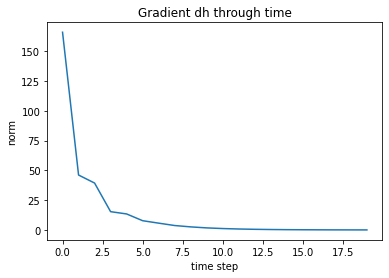

In [8]:
plt.plot(norm_list)
plt.title("Gradient dh through time")
plt.xlabel("time step")
plt.ylabel("norm")
plt.show()

## 기울기 폭발 대책: 기울기 클리핑 (Gradients Clipping)

In [2]:
import numpy as np
dW1 = np.random.rand(3,3)*10
dW2 = np.random.rand(3,3)*10
grads = [dW1, dW2]
max_norm = 5.0

In [3]:
def clip_grads(grads, max_norm):
  before = []
  after =[]
  total_norm = 0
  for grad in grads:
    total_norm += np.sum(grad**2)
  total_norm = np.sqrt(total_norm)

  rate = max_norm/(total_norm + 1e-6)
  if rate<1:
    for grad in grads:
      print("\n\nbefore:\n",grad)
      before.append(grad)
      grad *= rate
      print("\n\nafter:\n",grad)
      after.append(grad)
  if before == after:
    print("wrong result")
  return before, after

In [3]:
clip_grads(grads, max_norm)



before:
 [[4.09172584 5.33819472 8.35563086]
 [7.53742324 9.40704794 5.29224185]
 [8.27206735 2.82008261 4.41754514]]


after:
 [[0.81459816 1.06275048 1.66347449]
 [1.50058224 1.87279507 1.05360199]
 [1.64683831 0.56143403 0.87946365]]


before:
 [[4.07365109 4.49152233 6.36734363]
 [5.78919569 4.73091771 8.73722446]
 [0.33016074 4.99188775 3.45328287]]


after:
 [[0.81099977 0.89419135 1.26763782]
 [1.15253767 0.9418512  1.73944377]
 [0.0657298  0.99380622 0.68749422]]
wrong result


([array([[0.81459816, 1.06275048, 1.66347449],
         [1.50058224, 1.87279507, 1.05360199],
         [1.64683831, 0.56143403, 0.87946365]]),
  array([[0.81099977, 0.89419135, 1.26763782],
         [1.15253767, 0.9418512 , 1.73944377],
         [0.0657298 , 0.99380622, 0.68749422]])],
 [array([[0.81459816, 1.06275048, 1.66347449],
         [1.50058224, 1.87279507, 1.05360199],
         [1.64683831, 0.56143403, 0.87946365]]),
  array([[0.81099977, 0.89419135, 1.26763782],
         [1.15253767, 0.9418512 , 1.73944377],
         [0.0657298 , 0.99380622, 0.68749422]])])

(0.0, 10.0)

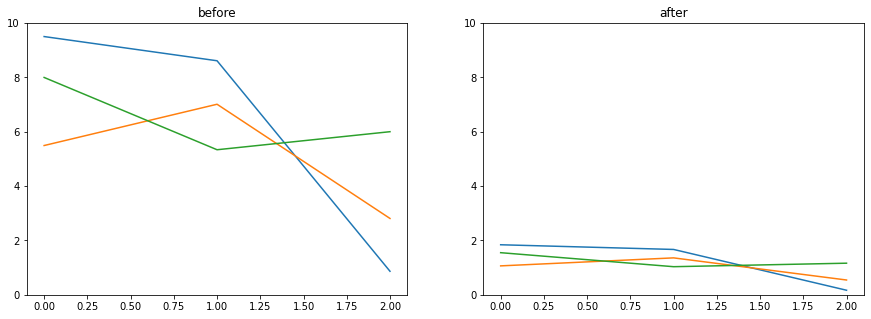

In [6]:
#왜 print할 때만 이렇게 나오지?
before1 = [[9.50124443, 5.49198645, 7.99668985],
 [8.6106708,  7.01086913, 5.33693227],
 [0.86597292, 2.8089426,  6.00072883]]
after1 =  [[1.84106889, 1.06418959, 1.54952933],
 [1.66850125, 1.35850553, 1.03414453],
 [0.16780074, 0.54429258, 1.16276928]]

fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].set_title("before")
axis[0].plot(before1)
axis[0].set_ylim(0,10)
axis[1].set_title("after")
axis[1].plot(after1)
axis[1].set_ylim(0,10)

(0.0, 10.0)

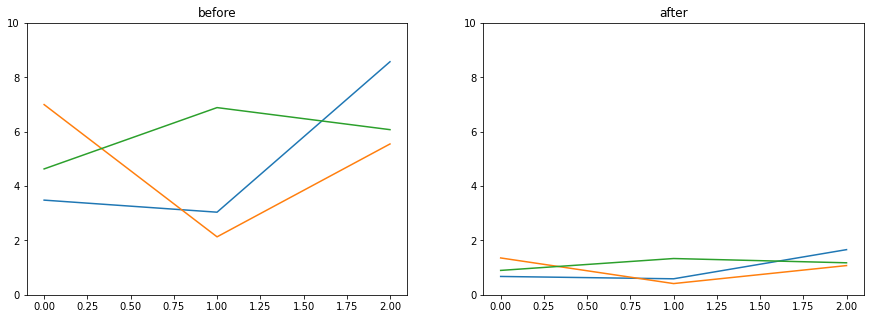

In [7]:
before2 = [[3.48315269, 6.99841774, 4.6312903 ],
 [3.03925185, 2.13250622, 6.88734466],
 [8.57451388, 5.54944962, 6.07602689]]
after2 = [[0.67493518, 1.35609281, 0.89741134],
 [0.58891991, 0.41321859, 1.33457002],
 [1.66149507, 1.07532431, 1.17735989]]
 
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
axis[0].set_title("before")
axis[0].plot(before2)
axis[0].set_ylim(0,10)
axis[1].set_title("after")
axis[1].plot(after2)
axis[1].set_ylim(0,10)

## LSTM(Long Short-Term Memory): 단기 기억을 긴 시간 동안 지속할 수 있음

LSTM을 사용하면 기울기 소실을 방지할 수 있다.

LSTM의 기억 셀이 장기 의존 관계를 유지(학습)하리라 기대할 수 있다.

In [4]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
class LSTM:
  def __init__(self, Wx, Wh, b):#가중치 매개변수: Wx,Wh 편향: b
    self.params = [Wx,Wh,b]#인스턴스 변수
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]#기울기 초기화
    self.cache = None#순전파 때 중간 결과를 보관했다가 역전파 계산에 사용하려는 용도의 인스턴스 변수
  
  def forward(self, x, h_prev, c_prev):#x: 현 시각의 입력, h_prev: 이전 시각의 은닉 상태, c_prev: 이전 시각의 기억 셀
    Wx, Wh, b= self.params
    N, H = h_prev.shape
    A = np.matmul(x,Wx)+np.matmul(h_prev, Wh)+b#아핀 변환

    #slice
    f = A[:,:H]
    g = A[:, H:2*H]
    i = A[:, 2*H:3*H]
    o = A[:, 3*H:]

    f = sigmoid(f)
    g = np.tanh(g)
    i = sigmoid(i)
    o = sigmoid(o)

    c_next = f*c_prev + g*i
    h_next = o*np.tanh(c_next)

    self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
    return h_next, 
    
  def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev

### Time LSTM: T개분의 시계열 데이터를 한꺼번에 처리하는 계층

In [6]:
import numpy as np
class TimeLSTM:
  def __init__(self, Wx,Wh, b, stateful = False):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.layers = None
    self.h, self.c = None, None
    self.dh = None
    self.stateful = stateful#은닉 상태를 인계받을지

  def forward(self, xs):
    Wx, Wh, b= self.params
    N,T, D = xs.shape
    H = Wh.shape[0]

    self.layers = []
    hs = np.empty((N,T,H), dtype = 'f')

    if not self.stateful or self.h is None:#은닉상태 인계받지 않거나 인계받을 것이 없으면
      self.h = np.zeroes((N,H), dtype = 'f')#초기화
    
    if not self.stateful or self.c is None:
      self.c = np.zeros((N,H), dtype = 'f')#초기화
    
    for t in range(T):
      layer = LSTM(*self.params)
      self.h, self.c = layer.forward(xs[:,t,:], self.h, self.c)
      hs[:,t,:] = self.h

      self.layers.append(layer)
    return hs
  

  def backward(self,dhs):
    Wx, wh, b= self.params
    N, T, H = dhs.shape
    D = Wx.shape[0]
    dxs = np.empty((N,T,D), dtype = 'f')
    dh, dc = 0,0

    grads = [0,0,0]
    for t in reversed(range(T)):
      layer = self.layers[t]
      dx, dh, dc = layer.backward(dhs[:,t,:]+dh,dc)
      dxs[:,t,:] = dx
      for i, grad in enumerate(layer.grads):
        grads[i]+= grad
    
    for i, grad in enumerate(grads):
      self.grads[i][...] = grad
      self.dh = dh
      return dxs
    
  def set_state(self, h, c= None):
    self.h, self.c = h,c
  
  def reset_state(self):
    self.h, self.c = None, None

clone repo from github

In [2]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git original

Cloning into 'original'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 606 (delta 1), reused 5 (delta 0), pack-reused 598
Receiving objects: 100% (606/606), 29.82 MiB | 37.46 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [3]:
!mkdir workspace

In [4]:
!mv /content/original/common workspace

In [5]:
!mv /content/original/dataset workspace

In [6]:
%cd workspace

/content/workspace


### LSTM을 사용한 언어 모델

In [12]:
import sys
sys.path.append('..')
from common.time_layers import *
import pickle

In [13]:
class Rnnlm:
  def __init__(self, vocab_size = 10000, wordvec_size = 100, hidden_size = 100):
    V,D,H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    #가중치 초기화
    embed_W = (rn(V,D)/100).astype('f')
    lstm_Wx = (rn(D,4*H)/np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H,4*H)/np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')
    affine_W  = (rn(H,V)/np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    #계층 생성
    self.layers = [
                   TimeEmbedding(embed_W),
                   TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful = True),
                   TimeAffine(affine_W, affine_b)
    ]
    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layer = self.layers[1]

    #모든 가중치와 기울기를 리스트에 모은다
    self.params, self.grads = [],[]
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads
  
  def predict(self, xs):
    for layer in self.layers:
      xs = layer.forward(xs)
    return xs
  
  def forward(self, xs, ts):
    score = self.predict(xs)
    loss = self.loss_layer.forward(score, ts)
    return loss
  
  def backward(self, dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout
  
  def reset_state(self):
    self.lstm_layer.reset_state()

  def save_params(self, file_name = 'Rnnlm.pkl'):
    with open(file_name, 'wb') as f:
      pickle.dump(self.params, f)
  
  def load_params(self, file_name = 'Rnnlm.pkl'):
    with open(file_name, 'rb') as f:
      self.params = pickle.load(f)
    



### PTB 데이터셋의 훈련 데이터를 전부 사용하여 학습

In [14]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb

In [15]:
#하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100# RNN 은닉 상태 벡터의 원소 수
time_size = 35# RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

In [16]:
#학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

In [17]:
#모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

In [18]:
#기울기 클리핑(기울기 폭발 대책)을 적용하여 학습
#eval_interval= 20: 20번째 반복마다 퍼플렉시티를 평가하라
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad, eval_interval=20)#max grad을 지정해 기울기 클리핑을 적용

| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9997.60
| 에폭 1 |  반복 21 / 1327 | 시간 7[s] | 퍼플렉서티 2955.75
| 에폭 1 |  반복 41 / 1327 | 시간 13[s] | 퍼플렉서티 1221.60
| 에폭 1 |  반복 61 / 1327 | 시간 20[s] | 퍼플렉서티 995.22
| 에폭 1 |  반복 81 / 1327 | 시간 28[s] | 퍼플렉서티 791.15
| 에폭 1 |  반복 101 / 1327 | 시간 34[s] | 퍼플렉서티 634.10
| 에폭 1 |  반복 121 / 1327 | 시간 41[s] | 퍼플렉서티 637.23
| 에폭 1 |  반복 141 / 1327 | 시간 47[s] | 퍼플렉서티 605.07
| 에폭 1 |  반복 161 / 1327 | 시간 54[s] | 퍼플렉서티 576.84
| 에폭 1 |  반복 181 / 1327 | 시간 61[s] | 퍼플렉서티 592.67
| 에폭 1 |  반복 201 / 1327 | 시간 67[s] | 퍼플렉서티 500.09
| 에폭 1 |  반복 221 / 1327 | 시간 74[s] | 퍼플렉서티 476.51
| 에폭 1 |  반복 241 / 1327 | 시간 81[s] | 퍼플렉서티 438.53
| 에폭 1 |  반복 261 / 1327 | 시간 87[s] | 퍼플렉서티 455.30
| 에폭 1 |  반복 281 / 1327 | 시간 94[s] | 퍼플렉서티 450.43
| 에폭 1 |  반복 301 / 1327 | 시간 100[s] | 퍼플렉서티 389.29
| 에폭 1 |  반복 321 / 1327 | 시간 107[s] | 퍼플렉서티 340.80
| 에폭 1 |  반복 341 / 1327 | 시간 115[s] | 퍼플렉서티 399.13
| 에폭 1 |  반복 361 / 1327 | 시간 122[s] | 퍼플렉서티 401.19
| 에폭 1 |  반복 381 / 1327 | 시간 129[s] | 퍼플렉서티 329.77


In [1]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,641 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

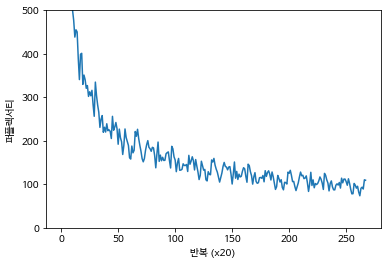

In [22]:
plt.rc('font', family='NanumBarunGothic')#한글 깨짐 방지
trainer.plot(ylim = (0,500))

(훈련 의사코드)


```
#기울기 구하기
model.forward()
model.backward()
params,grads = model.params, model.grads

#기울기 클리핑
if max_grad is not None:
  clip_grads(grads, max_grad)

#매개변수 갱신
optimizer.update(params, grads)

```



In [21]:
#테스트 데이터로 평가
model.reset_state()#모델 상태(LSTM의 은닉 사태와 기억셀)를 재설정하여 평가를 수행 (왜?)
ppl_test = eval_perplexity(model, corpus_test)
print("테스트 퍼플렉서티: ", ppl_test)

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  134.14396302995672


In [23]:
#매개변수 파일로 저장
model.save_params()

## RNNLM 추가 개선
- LSTM 계층 다층화 (PTB: LSTM 2층~4층)
- 드롭아웃 (과대적합 방지)
  - 변형 드롭아웃(Variational Dropout)
- 가중치 공유(Weight tying)

# Better Rnnlm

: Time Affine 계층과 Time Embedding 계층의 가중치 공유


<center>

$Loss$

$\uparrow$

$Time \quad Softmax\quad with\quad Loss$

$\qquad$$\qquad$$\uparrow$$\qquad$$\qquad$ $\uparrow$

$\qquad$$Time Affine$ $\quad ts$

$\uparrow$

$Time Dropout$

$\uparrow$

$Time LSTM$

$\uparrow$

$Time Dropout$

$\uparrow$

$Time LSTM$

$\uparrow$

$Time Dropout$

$\uparrow$

$Time Embedding$

$\uparrow$

$WS$ 
</center>

개선점:
1. LSTM계층의 다양화 (2층)
2. 드롭아웃 사용 (깊이 방향으로만 적용)
3. 가중치 공유 (Embedding 계층과 Affine 계층에서 가중치 공유)

In [7]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.np import *
from common.base_model import BaseModel

In [8]:
class BetterRnnlm(BaseModel):
  def __init__(self, vocab_size = 10000, wordvec_size = 650, hidden_size = 650, dropout_ratio = 0.5):
    V,D,H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    #embedding 초기화
    embed_W = (rn(V,D)/100).astype('f')

    #lstm 계층 초기화
    lstm_Wx1 = (rn(D,4*H)/np.sqrt(D)).astype('f')
    lstm_Wh1 = (rn(H,4*H)/np.sqrt(H)).astype('f')
    lstm_b1 = np.zeros(4*H).astype('f')
    lstm_Wx2 = (rn(D,4*H)/np.sqrt(H)).astype('f')
    lstm_Wh2 = (rn(H,4*H)/np.sqrt(H)).astype('f')
    lstm_b2 = np.zeros(4*H).astype('f')
    affine_b = np.zeros(V).astype('f')

    #세가지 개선
    self.layers = [
                   TimeEmbedding(embed_W),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful = True),
                   TimeDropout(dropout_ratio),
                   TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
                   TimeDropout(dropout_ratio),
                   TimeAffine(embed_W.T, affine_b)#가중치 공유(Time Embedding과)
    ]
    self.loss_layer = TimeSoftmaxWithLoss()
    self.lstm_layers = [self.layers[2],self.layers[4]]
    self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]
    self.params, self.grads = [],[]
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads
  
  def predict(self, xs, train_flg = False):
    for layer in self.drop_layers:
      layer.train_flg = train_flg
    for layer in self.layers:
      xs = layer.forward(xs)
    return xs
  
  def forward(self, xs, ts, train_flg = True):
    score = self.predict(xs, train_flg)
    loss = self.loss_layer.forward(score, ts)
    return loss
  
  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout
  
  def reset_state(self):
    for layer in self.lstm_layers:
      layer.reset_state()

학습 개선: 메 에폭에서 검증 데이터로 퍼플렉서티를 평가하고, 그 값이 나빠졌을 경우에만 학습률을 낮춤

In [9]:
#학습용 코드

#import necessity
import sys
sys.path.append('..')

from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb

In [10]:
#하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout=0.5

In [11]:
#학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_tet, _, _ = ptb.load_data('test')

Done
Done
Done


In [12]:
corpus_val

array([2211,  396, 1129, ...,  108,   27,   24])

In [13]:
vocab_size = len(word_to_id)
vocab_size

10000

In [14]:
id_to_word.items()

dict_items([(0, 'aer'), (1, 'banknote'), (2, 'berlitz'), (3, 'calloway'), (4, 'centrust'), (5, 'cluett'), (6, 'fromstein'), (7, 'gitano'), (8, 'guterman'), (9, 'hydro-quebec'), (10, 'ipo'), (11, 'kia'), (12, 'memotec'), (13, 'mlx'), (14, 'nahb'), (15, 'punts'), (16, 'rake'), (17, 'regatta'), (18, 'rubens'), (19, 'sim'), (20, 'snack-food'), (21, 'ssangyong'), (22, 'swapo'), (23, 'wachter'), (24, '<eos>'), (25, 'pierre'), (26, '<unk>'), (27, 'N'), (28, 'years'), (29, 'old'), (30, 'will'), (31, 'join'), (32, 'the'), (33, 'board'), (34, 'as'), (35, 'a'), (36, 'nonexecutive'), (37, 'director'), (38, 'nov.'), (39, 'mr.'), (40, 'is'), (41, 'chairman'), (42, 'of'), (43, 'n.v.'), (44, 'dutch'), (45, 'publishing'), (46, 'group'), (47, 'rudolph'), (48, 'and'), (49, 'former'), (50, 'consolidated'), (51, 'gold'), (52, 'fields'), (53, 'plc'), (54, 'was'), (55, 'named'), (56, 'this'), (57, 'british'), (58, 'industrial'), (59, 'conglomerate'), (60, 'form'), (61, 'asbestos'), (62, 'once'), (63, 'used')

In [15]:
xs = corpus[:-1]
xs#이게 머야? input?

array([ 0,  1,  2, ..., 64, 39, 26])

In [16]:
ts = corpus[1:]
ts#이게 머야? time?

array([ 1,  2,  3, ..., 39, 26, 24])

In [17]:
#모델 준비
model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

In [18]:
best_ppl = float('inf')#양의 무한대

In [ ]:
for epoch in range(max_epoch):
  trainer.fit(xs, ts, max_epoch = 1, batch_size = batch_size, time_size = time_size, max_grad = max_grad)#max grad 그래디언트 클리핑
  model.reset_state()
  ppl = eval_perplexity(model, corpus_val)
  print("검증 퍼플렉시티:",ppl)

  if best_ppl > ppl:
    best_ppl = ppl
    model.save_params()
  else:
    lr /= 4.0#성능이 낮으면(best_ppl보다 현재 퍼플렉시티가 높으면) 학습률 줄임
    optimizer.lr = lr
  
  model.reset_state()
  print("-"*50)

| 에폭 1 |  반복 1 / 1327 | 시간 6[s] | 퍼플렉서티 10000.49
| 에폭 1 |  반복 21 / 1327 | 시간 72[s] | 퍼플렉서티 3755.05
| 에폭 1 |  반복 41 / 1327 | 시간 138[s] | 퍼플렉서티 1758.62
| 에폭 1 |  반복 61 / 1327 | 시간 204[s] | 퍼플렉서티 1297.32
| 에폭 1 |  반복 81 / 1327 | 시간 270[s] | 퍼플렉서티 1078.92
| 에폭 1 |  반복 101 / 1327 | 시간 336[s] | 퍼플렉서티 818.62
| 에폭 1 |  반복 121 / 1327 | 시간 402[s] | 퍼플렉서티 805.26
| 에폭 1 |  반복 141 / 1327 | 시간 468[s] | 퍼플렉서티 714.88
| 에폭 1 |  반복 161 / 1327 | 시간 535[s] | 퍼플렉서티 699.48
| 에폭 1 |  반복 181 / 1327 | 시간 601[s] | 퍼플렉서티 699.19
| 에폭 1 |  반복 201 / 1327 | 시간 668[s] | 퍼플렉서티 590.91
| 에폭 1 |  반복 221 / 1327 | 시간 733[s] | 퍼플렉서티 555.17
| 에폭 1 |  반복 241 / 1327 | 시간 799[s] | 퍼플렉서티 521.73
| 에폭 1 |  반복 261 / 1327 | 시간 864[s] | 퍼플렉서티 538.88
| 에폭 1 |  반복 281 / 1327 | 시간 929[s] | 퍼플렉서티 521.16
| 에폭 1 |  반복 301 / 1327 | 시간 994[s] | 퍼플렉서티 446.60
| 에폭 1 |  반복 321 / 1327 | 시간 1060[s] | 퍼플렉서티 395.03
| 에폭 1 |  반복 341 / 1327 | 시간 1125[s] | 퍼플렉서티 447.45
| 에폭 1 |  반복 361 / 1327 | 시간 1190[s] | 퍼플렉서티 464.25
| 에폭 1 |  반복 381 / 1327 | 시간 12

In [ ]:
plt.rc('font', family='NanumBarunGothic')#한글 깨짐 방지
trainer.plot(ylim = (0,500))